<a href="https://colab.research.google.com/github/Ebasurtos/Machine-Learning/blob/main/Grupo8_MAestr%C3%ACa_Practica_clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Tema 7:  Clustering
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Kmeans and Mean-Shift\\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**


### Descripción de la Práctica: Clasificación de Píxeles en Imágenes de Tomografía Cerebral mediante Algoritmos de Clustering

1. Objetivo Principal:
Esta práctica tiene como objetivo principal aplicar algoritmos de clustering de la librería scikit-learn en Python para clasificar los píxeles de una imagen de tomografía cerebral. El fin es agrupar píxeles con características similares, lo que permitirá la identificación y diferenciación de estructuras cerebrales, tanto normales como potencialmente anómalas.

2. Entrada:
La entrada para esta práctica será una imagen digital de tomografía cerebral (por ejemplo, una resonancia magnética o tomografía computarizada). Esta imagen será tratada como un conjunto de datos donde cada píxel representa una muestra con sus propias características (por ejemplo, intensidad de gris, valores de color, o incluso características extraídas del contexto local del píxel).

3. Tarea:
Se utilizarán métodos de clustering no supervisado (como K-Means y Mean Shift disponibles en scikit-learn) para:

    - Representar los píxeles: Convertir la imagen en un formato adecuado para los algoritmos de clustering, donde cada píxel se considere un punto de datos en un espacio de características.

    - Agrupar píxeles: Aplicar el algoritmo de clustering seleccionado para segmentar la imagen, asignando cada píxel a un grupo (clúster) específico.

    - Análisis de Clústeres: Interpretar los clústeres resultantes. La hipótesis es que los píxeles que pertenecen a la misma estructura cerebral (ej. materia gris, materia blanca, líquido cefalorraquídeo, o una lesión) se agruparán en el mismo clúster debido a sus características similares.

    - Redibujar la imagen asignando un único color a cada píxel según el clúster al que pertenece, de modo que se visualicen claramente las estructuras del cerebro.

4. Resultados Esperados y Aplicación:
Al finalizar la práctica, se espera obtener una segmentación de la imagen cerebral que visualice claramente los diferentes grupos de píxeles. Esto permitirá:

    - Detección de Estructuras: Identificar y agrupar píxeles que corresponden a tejidos cerebrales normales (ej. córtex, cerebelo, tronco encefálico).

    - Identificación de Anomalías: Potencialmente, detectar y aislar regiones de píxeles que presenten características atípicas, sugiriendo la presencia de anomalías como tumores, edemas, o lesiones, diferenciándolas del tejido sano circundante.

Esta práctica no solo refuerza la comprensión de los algoritmos de clustering, sino que también introduce su aplicación práctica en el campo del procesamiento de imágenes médicas y la bioinformática.

### Enlaces a la Documentación de Scikit-learn para Clustering

| Algoritmo de Clustering | Clase en `sklearn.cluster` | Enlace a la Documentación Oficial |
| :---------------------- | :------------------------- | :--------------------------------- |
| **K-Means** | `KMeans`                   | [Documentación de KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) |
| **Mean Shift** | `MeanShift`                | [Documentación de MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) |


In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


Intentando cargar imagen desde: https://ars.els-cdn.com/content/image/1-s2.0-S2665917424000023-gr5.jpg


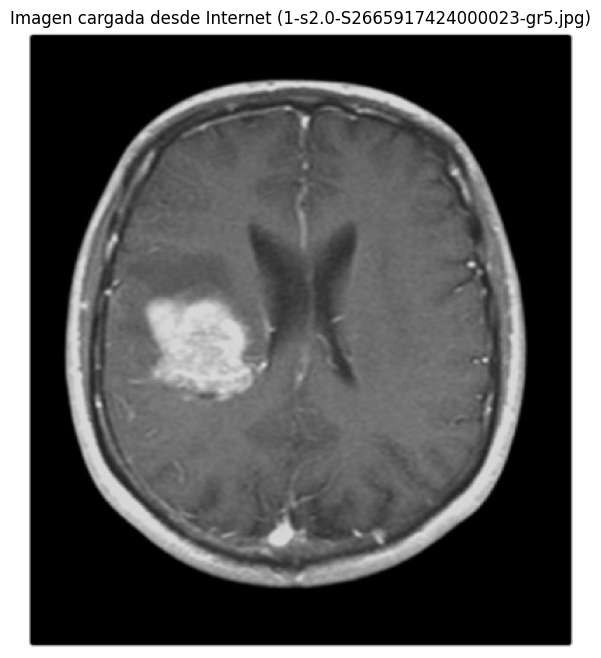

In [ ]:

image_url = "https://ars.els-cdn.com/content/image/1-s2.0-S2665917424000023-gr5.jpg"
print(f"Intentando cargar imagen desde: {image_url}")

def read_image_from_url(image_url):
    response = requests.get(image_url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content))
    return image

def plot_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Imagen cargada desde Internet ({image_url.split('/')[-1]})")
    plt.axis('off')
    plt.show()


image = read_image_from_url(image_url)
plot_image(image)


Cargando imagen...
Tamaño de la imagen: (389, 439)
Total de píxeles a procesar: 170771

Aplicando K-Means...
K-Means completado en 1.00 segundos

Aplicando Mean Shift...
Mean Shift completado en 0.70 segundos
Número de clusters encontrados: 5


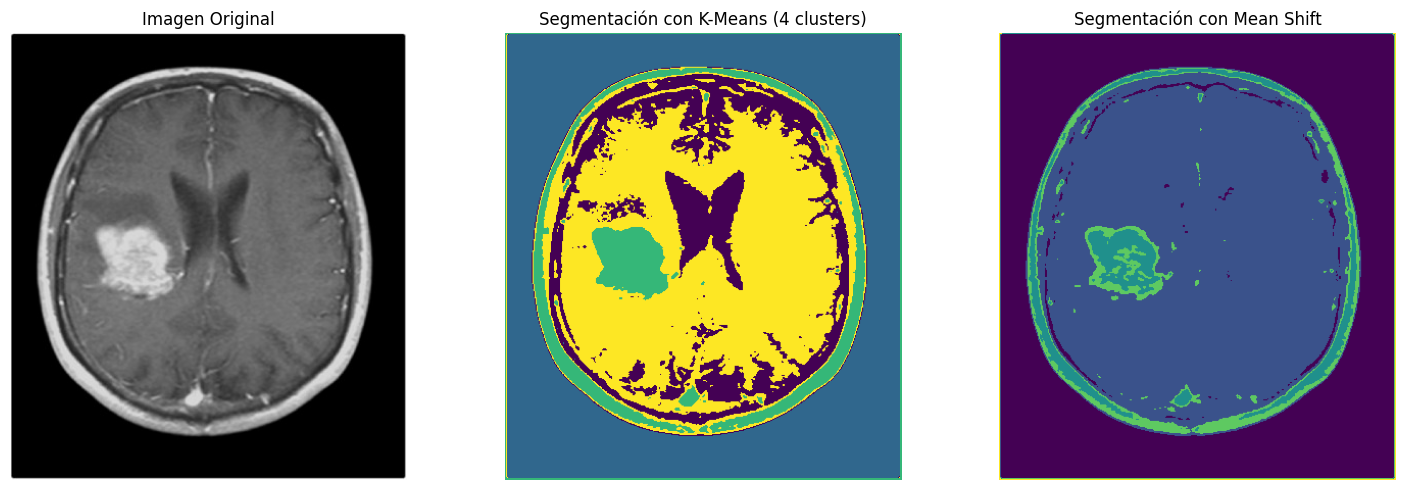

In [6]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from time import time

# Cargar la imagen desde la URL
image_url = "https://ars.els-cdn.com/content/image/1-s2.0-S2665917424000023-gr5.jpg"

def read_image_from_url(image_url):
    response = requests.get(image_url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content))
    return image

def preprocess_image(image):
    # Convertir a array numpy y normalizar
    image_array = np.array(image)

    # Si la imagen es RGBA, tomar solo los canales RGB
    if image_array.shape[-1] == 4:
        image_array = image_array[..., :3]

    # Normalizar valores de píxeles a [0, 1]
    image_array = image_array / 255.0

    # Obtener dimensiones de la imagen
    height, width = image_array.shape[0], image_array.shape[1]

    # Aplanar la imagen a una lista de píxeles
    pixels = image_array.reshape(-1, 3)

    return pixels, height, width

def apply_kmeans(pixels, n_clusters=4):
    print("\nAplicando K-Means...")
    start_time = time()

    # Escalar los datos para mejor rendimiento de K-Means
    scaler = StandardScaler()
    pixels_scaled = scaler.fit_transform(pixels)

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(pixels_scaled)
    labels = kmeans.labels_

    print(f"K-Means completado en {time() - start_time:.2f} segundos")
    return labels

def apply_mean_shift(pixels):
    print("\nAplicando Mean Shift...")
    start_time = time()

    # Escalar los datos
    scaler = StandardScaler()
    pixels_scaled = scaler.fit_transform(pixels)

    # Tomar una muestra para Mean Shift (es computacionalmente intensivo)
    sample_size = 2000 if len(pixels_scaled) > 2000 else len(pixels_scaled)
    sample_indices = np.random.choice(len(pixels_scaled), sample_size, replace=False)
    sample_pixels = pixels_scaled[sample_indices]

    # Aplicar Mean Shift
    ms = MeanShift(bin_seeding=True)
    ms.fit(sample_pixels)
    sample_labels = ms.labels_

    # Predecir etiquetas para todos los píxeles usando el modelo entrenado
    labels = ms.predict(pixels_scaled)

    print(f"Mean Shift completado en {time() - start_time:.2f} segundos")
    print(f"Número de clusters encontrados: {len(np.unique(labels))}")
    return labels

def plot_results(original_image, kmeans_labels, ms_labels, height, width):
    # Reconstruir imágenes segmentadas
    kmeans_segmented = kmeans_labels.reshape(height, width)
    ms_segmented = ms_labels.reshape(height, width)

    # Crear figura
    plt.figure(figsize=(15, 5))

    # Imagen original
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Imagen Original")
    plt.axis('off')

    # Segmentación K-Means
    plt.subplot(1, 3, 2)
    plt.imshow(kmeans_segmented, cmap='viridis')
    plt.title("Segmentación con K-Means (4 clusters)")
    plt.axis('off')

    # Segmentación Mean Shift
    plt.subplot(1, 3, 3)
    plt.imshow(ms_segmented, cmap='viridis')
    plt.title("Segmentación con Mean Shift")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # Cargar y mostrar imagen original
    print("Cargando imagen...")
    image = read_image_from_url(image_url)
    print(f"Tamaño de la imagen: {image.size}")

    # Preprocesar imagen
    pixels, height, width = preprocess_image(image)
    print(f"Total de píxeles a procesar: {len(pixels)}")

    # Aplicar K-Means
    kmeans_labels = apply_kmeans(pixels)

    # Aplicar Mean Shift
    ms_labels = apply_mean_shift(pixels)

    # Mostrar resultados
    plot_results(image, kmeans_labels, ms_labels, height, width)

if __name__ == "__main__":
    main()